In [1]:
from fairness.matching import conscious_fairness_through_unawareness
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = pd.read_csv('./dataset/adult/adult.data', sep=',')

In [ ]:
print("Columns original dataset: ", len(dataset.columns))

In [4]:
columns_to_drop = ['education-num']
protected_attributes = ['sex', 'race', 'relationship', 'native-country']
output_column = 'income'

In [5]:
fair_dataset = conscious_fairness_through_unawareness(dataset, protected_attributes, output_column, columns_to_drop)

unfair


In [6]:
print("Columns fair dataset: ", len(fair_dataset.columns))

,age,workclass,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income
0,39,7,77516,9,2174,0,40,0
1,50,6,83311,9,0,0,13,0
2,38,4,215646,11,0,0,40,0
3,53,4,234721,1,0,0,40,0
4,28,4,338409,9,0,0,40,0
...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,0,0,38,0
32557,40,4,154374,11,0,0,40,1
32558,58,4,151910,11,0,0,40,0
32559,22,4,201490,11,0,0,20,0


In [7]:
output_column = "income"

In [8]:
X = fair_dataset.iloc[:,:len(fair_dataset.columns) - 2]
y = fair_dataset.loc[:, output_column:]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
standard_scaler_train = StandardScaler()
X_train = standard_scaler_train.fit_transform(X_train)

standard_scaler_test = StandardScaler()
X_test = standard_scaler_test.fit_transform(X_test)

In [12]:
svc_classifier = SVC()
random_forest_classifier = RandomForestClassifier()
decision_tree_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()

models = [
    svc_classifier,
    random_forest_classifier,
    decision_tree_classifier,
    knn_classifier
]

svc_params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : range(1, 10),
    'gamma' : ['scale', 'auto']
}

random_forest_params = {
    'min_samples_leaf': [5, 7, 9, 11],
    'n_estimators': [200, 500],
    'max_depth' : [10, 20, 50, 80, 100, 150],
    'criterion' :['gini', 'entropy']
}

decision_tree_params = {
    'min_samples_leaf': [5, 7, 9, 11],
    'max_depth' : [10, 20, 50, 80, 100, 150],
    'criterion' :['gini', 'entropy']
}

knn_params = {
    'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(20, 50),
}


model_params = [svc_params, random_forest_params, decision_tree_params, knn_params]

In [13]:
best_params = None
max_accuracy = 0
best_model = None

for model_index in range(0, len(models)):
    
    grid_search = GridSearchCV(
    estimator=models[model_index],
    param_grid=model_params[model_index],
    scoring='accuracy', 
    return_train_score=True,
    cv=3
    )

    grid_search_classifier = grid_search.fit(X_train, y_train)
    y_pred = grid_search_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > max_accuracy:
        best_params = grid_search_classifier.best_params_
        best_model = models[model_index]




In [ ]:
print("Best model: ", best_model)
print("Best_params: ", best_params)
print("Accuracy: ", max_accuracy)


In [16]:
#print("Accuracy score on Test set: ", accuracy_score(y_test, y_pred))
#print("Accuracy score on Train set: ", accuracy_score(y_train, grid_search_classifier.predict(X_train)))
#print(classification_report(y_test, y_pred))

Accuracy score on Test set:  0.8148318747121143
Accuracy score on Train set:  0.8559198402948403
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4942
           1       0.76      0.34      0.47      1571

    accuracy                           0.81      6513
   macro avg       0.79      0.65      0.68      6513
weighted avg       0.81      0.81      0.79      6513



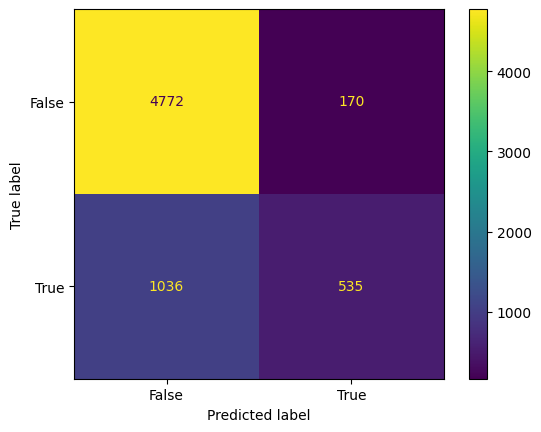

In [17]:
#cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[False, True])
#cm_display.plot()
#plt.show()